###1. Can we use Bagging for regression problems?
Yes, Bagging can be applied to regression using models like Bagging Regressor.

###2. What is the difference between multiple model training and single model training?
Multiple model training combines several models; single model training uses only one model.

###3. Explain the concept of feature randomness in Random Forest.
Each split considers a random subset of features, increasing diversity among trees.

###4. What is OOB (Out-of-Bag) Score?
It is an internal validation score computed using samples not included in bootstrap sampling.

###5. How can you measure the importance of features in a Random Forest model?
By calculating the decrease in impurity or permutation importance.

###6. Explain the working principle of a Bagging Classifier.
It trains multiple models on bootstrapped samples and aggregates their predictions.

###7. How do you evaluate a Bagging Classifier's performance?
Using metrics like accuracy, precision, recall, or cross-validation.

###8. How does a Bagging Regressor work?
It averages predictions from multiple regressors trained on bootstrapped data.

###9. What is the main advantage of ensemble techniques?
They improve model accuracy and generalization.

###10. What is the main challenge of ensemble methods?
Higher computational cost and reduced interpretability.

###11. Explain the key idea behind ensemble techniques.
Combining weak learners to form a strong predictive model.

###12. What is a Random Forest Classifier?
It is an ensemble of decision trees using bagging and feature randomness.

###13. What are the main types of ensemble techniques?
Bagging, Boosting, and Stacking.

###14. What is ensemble learning in machine learning?
It is the technique of combining multiple models to improve performance.

###15. When should we avoid using ensemble methods?
When data is small or model interpretability is critical.

###16. How does Bagging help in reducing overfitting?
It reduces variance by averaging multiple models.

###17. Why is Random Forest better than a single Decision Tree?
It reduces overfitting and improves stability and accuracy.

###18. What is the role of bootstrap sampling in Bagging?
It creates diverse training datasets for each model.

###19. What are some real-world applications of ensemble techniques?
Fraud detection, credit scoring, medical diagnosis, and recommendation systems.

###20. What is the difference between Bagging and Boosting?
Bagging reduces variance; Boosting reduces bias by focusing on errors.

In [1]:
#21 - Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

1.0


In [2]:
#22 - Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

model.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))

0.2582477439355284


In [3]:
#23 - Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print(model.feature_importances_)

[0.03971058 0.01460399 0.05314639 0.04277978 0.00816485 0.01140166
 0.08321459 0.0902992  0.00443533 0.00443395 0.01951684 0.00459978
 0.00868228 0.04355077 0.00464415 0.0036549  0.00701442 0.00504716
 0.00371411 0.00658253 0.08127686 0.01649014 0.07138828 0.12319232
 0.01033481 0.01580059 0.03174022 0.17229521 0.01310266 0.00518165]


In [4]:
#24 - Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

print(mean_squared_error(y_test, rf.predict(X_test)))
print(mean_squared_error(y_test, dt.predict(X_test)))

0.0337993006993007
0.04895104895104895


In [5]:
#25 - Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

model = RandomForestClassifier(oob_score=True, random_state=42)
model.fit(X_train, y_train)

print(model.oob_score_)

0.960093896713615


In [6]:
#26 - Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.svm import SVC

model = BaggingClassifier(
    estimator=SVC(kernel="linear"),
    n_estimators=20,
    random_state=42
)

model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

0.965034965034965


In [7]:
#27 - Train a Random Forest Classifier with different numbers of trees and compare accuracy.

for n in [10, 50, 100]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    print(n, accuracy_score(y_test, model.predict(X_test)))

10 0.951048951048951
50 0.972027972027972
100 0.965034965034965


In [26]:
#28 - Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),
    n_estimators=20,
    random_state=42
)

model.fit(X_train_s, y_train)
probs = model.predict_proba(X_test_s)[:, 1]

print(roc_auc_score(y_test, probs))

0.9975031210986268


In [9]:
#29 - Train a Random Forest Regressor and analyze feature importance scores.

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

print(rf.feature_importances_)

[0.00406077 0.01755896 0.00312659 0.00630203 0.00342732 0.00070398
 0.00191186 0.3209753  0.00201282 0.00303705 0.0072529  0.00316509
 0.00361855 0.01198089 0.00438724 0.00170767 0.00495764 0.00164607
 0.00261106 0.00564809 0.05222607 0.02772496 0.13801831 0.08283969
 0.00745659 0.00382889 0.01469913 0.25420402 0.00649847 0.00241198]


In [10]:
#30 - Train an ensemble model using both Bagging and Random Forest and compare accuracy.

bag = BaggingClassifier(DecisionTreeClassifier(), random_state=42)
rf = RandomForestClassifier(random_state=42)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

print(accuracy_score(y_test, bag.predict(X_test)))
print(accuracy_score(y_test, rf.predict(X_test)))

0.9440559440559441
0.965034965034965


In [11]:
#31 - Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'n_estimators': 50}
0.9600820793433652


In [12]:
#32 - Train a Bagging Regressor with different numbers of base estimators and compare performance.

for n in [10, 50, 100]:
    model = BaggingRegressor(
        DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    print(n, mean_squared_error(y_test, model.predict(X_test)))

10 0.040489510489510494
50 0.03354685314685315
100 0.031858041958041955


In [13]:
#33 - Train a Random Forest Classifier and analyze misclassified samples.

pred = rf.predict(X_test)
misclassified = X_test[pred != y_test]

print(len(misclassified))

5


In [14]:
#34 - Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

dt = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(dt, random_state=42)

dt.fit(X_train, y_train)
bag.fit(X_train, y_train)

print(accuracy_score(y_test, dt.predict(X_test)))
print(accuracy_score(y_test, bag.predict(X_test)))

0.951048951048951
0.9440559440559441


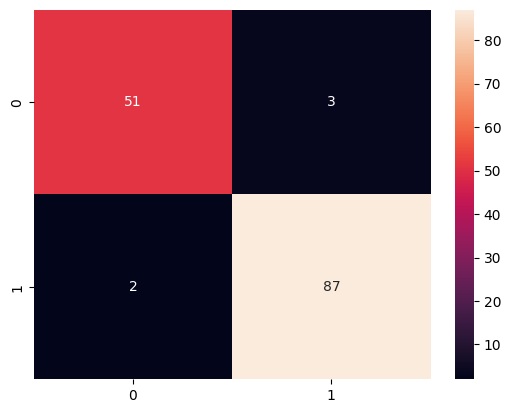

[[51  3]
 [ 2 87]]


In [15]:
#35 - Train a Random Forest Classifier and visualize the confusion matrix.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print(cm)

In [27]:
#36 - Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

estimators = [
    ("dt", DecisionTreeClassifier(random_state=42)),
    ("svm", SVC(probability=True, random_state=42)),
    ("lr", LogisticRegression(max_iter=1000, random_state=42))
]

model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

model.fit(X_train_s, y_train)
print(accuracy_score(y_test, model.predict(X_test_s)))

0.9790209790209791


In [17]:
#37 - Train a Random Forest Classifier and print the top 5 most important features.

import numpy as np

indices = np.argsort(rf.feature_importances_)[-5:]
print(indices)

[20  6  7 23 27]


In [18]:
#38 - Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.metrics import precision_score, recall_score, f1_score

pred = bag.predict(X_test)

print(precision_score(y_test, pred, average="macro"))
print(recall_score(y_test, pred, average="macro"))
print(f1_score(y_test, pred, average="macro"))

0.938115763546798
0.9441323345817727
0.9409090909090909


In [19]:
#39 - Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

for d in [None, 3, 5, 10]:
    model = RandomForestClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    print(d, accuracy_score(y_test, model.predict(X_test)))

None 0.965034965034965
3 0.965034965034965
5 0.965034965034965
10 0.965034965034965


In [20]:
#40 - Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

from sklearn.neighbors import KNeighborsRegressor

dt_bag = BaggingRegressor(DecisionTreeRegressor(), random_state=42)
knn_bag = BaggingRegressor(KNeighborsRegressor(), random_state=42)

dt_bag.fit(X_train, y_train)
knn_bag.fit(X_train, y_train)

print(mean_squared_error(y_test, dt_bag.predict(X_test)))
print(mean_squared_error(y_test, knn_bag.predict(X_test)))

0.040489510489510494
0.027854545454545455


In [21]:
#41 - Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.metrics import roc_auc_score

probs = rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, probs))

0.9962546816479401


In [22]:
#42 - Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(bag, X, y, cv=5)
print(scores.mean())

0.9508306163639186


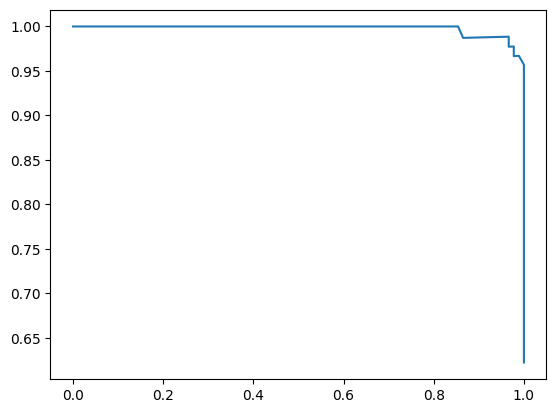

PR curve plotted


In [23]:
#43 - Train a Random Forest Classifier and plot the Precision-Recall curve.

from sklearn.metrics import precision_recall_curve

probs = rf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.plot(recall, precision)
plt.show()

print("PR curve plotted")

In [28]:
#44 - Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

estimators = [
    ("rf", RandomForestClassifier(random_state=42)),
    ("lr", LogisticRegression(max_iter=1000, random_state=42))
]

model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

model.fit(X_train_s, y_train)
print(accuracy_score(y_test, model.predict(X_test_s)))

0.9790209790209791


In [25]:
#45 - Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

for b in [True, False]:
    model = BaggingRegressor(
        DecisionTreeRegressor(),
        bootstrap=b,
        random_state=42
    )
    model.fit(X_train, y_train)
    print(b, mean_squared_error(y_test, model.predict(X_test)))

True 0.040489510489510494
False 0.0486013986013986
